# WQD7005 - Data Mining
## Lab Exersice 1

#### Matrix Number : 17043640

#### Name                 : Gunasegarran Magadevan

i) Understanding data: exploring and visualising data to gain initial insights and understanding.
ii) Dealing with missing values: missing values are detrimental to performance of data mining models.
iii) Noise and errorneous data cleaning: similar to missing values, they can also negatively impact data mining models and analysis.
iv) Data formatting: formatting data into a format suitable for the underlying algorithm and framework to be used. 
This includes setting correct roles and data types for variables based on their analytics purpose.


You will be learned about how to load the lab1 dataset and review overall information about fields in the dataset.

In predictive data mining process, there must be a target variable whose value is to be predicted. 
In this dataset, we aim to classify whether a person is a lapsing donor or not, corresponding to TargetB. 
We are focusing on "classification" prediction mining. We are not interested in knowing the exact amount of donation that 
a person will make. In other words, we will not treat this problem as “regression“ prediction problem. 
Therefore, we will not need TargetD and it will be dropped from the dataset.

In [1]:
import pandas as pd

df = pd.read_csv('lab1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
TargetB             9686 non-null int64
ID                  9686 non-null int64
TargetD             4843 non-null float64
GiftCnt36           9686 non-null int64
GiftCntAll          9686 non-null int64
GiftCntCard36       9686 non-null int64
GiftCntCardAll      9686 non-null int64
GiftAvgLast         9686 non-null float64
GiftAvg36           9686 non-null float64
GiftAvgAll          9686 non-null float64
GiftAvgCard36       7906 non-null float64
GiftTimeLast        9686 non-null int64
GiftTimeFirst       9686 non-null int64
PromCnt12           9686 non-null int64
PromCnt36           9686 non-null int64
PromCntAll          9686 non-null int64
PromCntCard12       9686 non-null int64
PromCntCard36       9686 non-null int64
PromCntCardAll      9686 non-null int64
StatusCat96NK       9686 non-null object
StatusCatStarAll    9686 non-null int64
DemCluster          9686 non-null int64
De

2. Exploring data
Exploring and validating content of your data is a vital part of the data preparation process. By assaying the prepared data,
you substantially reduce the chances of errorneous results in your analysis and gain visual insights into associations between variables. This section will guide you to find these vital insights.

Firstly, let's take a closer look on the dataset. The dataframe .info() output revealed a number of important information from the dataset:

Number of rows (or entries): ???
Number of fields (or columns): ???
Number of entries and data type for each column: e.g. ??? entries and integer number for Target B; 
??? entries and floating point for GiftAvgCard36.
From point three, we learned there are irregularities in some columns. 
For example, with ??? rows in the whole dataset, there are only ??? data points in GiftAvgCard36. 
This requires a deeper investigation of each column.

2.1. Explore column data
Assume we would like to investigate the DemAge column of this dataset in depth. Recall, a column in Pandas is called a Series, 
and there are many functions providing insights on the characteristic and distribution of the data.

Essential functions for data exploration in Pandas
Function pandas.Series.describe() prints key statistics of a series, including count (number of non-missing values), 
mean (average), std (standard deviation), min, max, and quantiles (typically at 25%, 50%, 75%. 50% quantile is also called as median).

Function pandas.Series.unique() prints unique values in a Series. Typically used for categorical variables.

Function pandas.Series.value_counts() prints unique values and corresponding count in a Series. Also commonly used for 
categorical variables.

Let's start with .describe(). Run the following command into your iPython console.


To check the unique values and how many records for each value, we could use .unique() and .value_counts() functions.

When dealing with interval variables, typically binning (categorising values into certain ranges) is very common to allow 
easier interpretation. In pandas, we can do this by supplying bins parameter into the .value_counts() function.


The output of these functions revealed a number of data problems with "DemAge" column.

There are only ??? records in "DemAge" column (from .describe()'s count output), while the total number of records in this data set 
is ???. This indicates missing values in "DemAge". This observation is also visible through the NaN printed by .unique() method.
One record in "DemAge" has 0 as value (from the .value_counts() output). Logically, someone should not have age of 0. 
It indicates an errorneous data that needs to be removed from this column.
These problems need to be rectified before building data mining models. We will learn the techniques to fix data issues later in section 3.

Could you spot data problems in other columns using .describe(), .unique() and .value_counts()?

In [2]:
df['DemAge'].describe()

count    7279.000000
mean       59.150845
std        16.516400
min         0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: DemAge, dtype: float64

In [3]:
df['DemAge'].unique()

array([nan, 67., 53., 47., 58., 39., 50., 45., 80., 61., 76., 41., 75.,
       59., 51., 31., 54., 70., 42., 65., 81., 38., 56., 69., 52., 33.,
       73., 71., 29., 60., 83., 43., 35., 77., 44., 72., 64., 34., 55.,
       37., 57., 46., 49., 32., 66., 87., 40., 79., 25., 63., 62., 48.,
       68., 86., 23., 27., 74., 78., 85., 26.,  7., 36., 82., 24., 17.,
       30., 84., 21., 28., 22., 19., 16., 14.,  6.,  0.,  2., 20., 18.,
       15.,  4.])

In [4]:
df['DemAge'].value_counts()

73.0    216
67.0    215
75.0    203
49.0    201
57.0    187
77.0    183
55.0    182
65.0    181
47.0    179
69.0    178
71.0    173
51.0    167
79.0    165
45.0    164
74.0    162
53.0    152
59.0    150
76.0    139
43.0    138
63.0    138
81.0    136
61.0    136
50.0    131
37.0    125
41.0    124
78.0    123
80.0    123
72.0    122
70.0    116
68.0    116
       ... 
84.0     70
27.0     69
86.0     68
33.0     65
31.0     59
36.0     57
38.0     53
17.0     46
34.0     42
29.0     33
7.0      32
32.0     31
30.0     24
26.0     19
28.0     19
25.0     17
23.0     12
22.0      7
24.0      6
16.0      5
21.0      5
19.0      4
6.0       3
14.0      1
0.0       1
2.0       1
20.0      1
4.0       1
18.0      1
15.0      1
Name: DemAge, Length: 79, dtype: int64

In [5]:
df['DemAge'].value_counts(bins=10)

(69.6, 78.3]     1437
(60.9, 69.6]     1250
(43.5, 52.2]     1223
(52.2, 60.9]     1043
(78.3, 87.0]      932
(34.8, 43.5]      889
(26.1, 34.8]      342
(17.4, 26.1]       72
(8.7, 17.4]        53
(-0.088, 8.7]      38
Name: DemAge, dtype: int64

In [6]:
df.groupby(['TargetB'])['DemAge'].mean()

TargetB
0    58.304444
1    59.979070
Name: DemAge, dtype: float64

2.2. Grouping and plotting distributions of columns
From the previous section, you have revealed some issues with each column in this dataset. This is not enough, however, 
as we also need to look into interaction between two or more variables. In addition, plotting distribution of data column(s) 
might produce more insights on the problems in this data.

Grouping is commonly used to see whether there is a trend between two or more different fields. For example, we would like to 
know specific correlations between tendency to be a lapsing donor (TargetB) and age (DemAge), gender (DemGender) or 
median home value (DemMedHomeValue). In pandas, grouping can be performed using the .groupby() method. .groupby() will
return a grouped Series, which we can run value_counts(), mean(), .median() and many other Series functions on.

Let's start with age (DemAge). Run the following command to get the average age of lapsing donors vs non-lapsing donors.

Other than .mean(), we could also perform grouping with other method such as .value_counts() or .median(). Use value_counts() to 
get gender of lapsing and non-lapsing donors.

get the value count of each gender.

add normalisation to get the relative frequency


It seems there is an equal proportion of female/male/unknown gender donors in both lapsing and non-lapsing donors.

While all of the methods we have used so far are very useful in providing information about the data, data mining professionals 
commonly visualise these information in plots for easier presentation. In Python, there are many libraries to draw great data plots, 
such as matplotlib, seaborn, ggplot, plotly and bokeh. In this unit, we will use seaborn and matplotlib,
two of the most popular visualisation libraries. Import both of them with the following command.

Plotting the distribution values in a field/column is a common visualization task. A number options exist in seaborn/matplotlib. 
For interval/numerical variables, distplot can be used. Let's try that for "DemAge". distplot is sensitive towards missing values 
(which are present in "DemAge"), thus we have to drop them using dropna() method.


From the plot above, we can see most donors are between 40-80 years old, with the data distribution skewed to right.

Distribution plots are typically use only for interval/numerical variables. For nominal/categorical variables, 
such as DemGender, countplot is used to build a bar chart to show distribution of each values.

Lastly, we can explore the distribution of a variable using boxplot. Assume we would like to see the difference of home values of 
the donors vs non-donors. We can build a boxplot with TargetB as X and DemMedHomeValue as y.


The boxplot shows a slight difference of home values of lapsing and non-lapsing donors. Lapsing donors have slightly higher average and maximum home value, sign of affluence and wealth.

Could you visualize other columns using distplot, countplot and boxplot?

With practice, you should be able to master exploration and visualisation skill, to use specific functions suited best for a 
particular field.


In [7]:
print(df.groupby(['TargetB'])['DemGender'].value_counts())
print ("--------------------")
df.groupby(['TargetB'])['DemGender'].value_counts(normalize=True)

TargetB  DemGender
0        F            2614
         M            1963
         U             266
1        F            2609
         M            1962
         U             272
Name: DemGender, dtype: int64
--------------------


TargetB  DemGender
0        F            0.539748
         M            0.405327
         U            0.054925
1        F            0.538716
         M            0.405121
         U            0.056164
Name: DemGender, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__

'0.9.0'

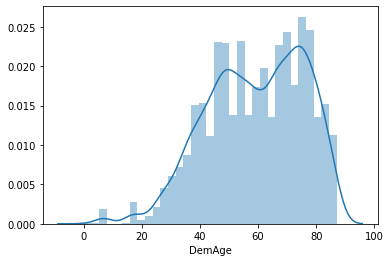

In [9]:
dg = sns.distplot(df['DemAge'].dropna())

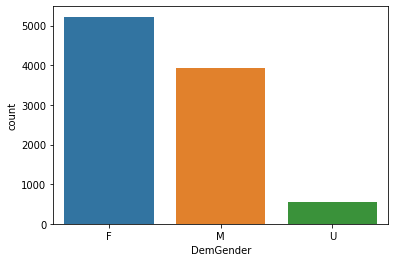

In [10]:
dc = sns.countplot(data=df, x='DemGender')
plt.show()

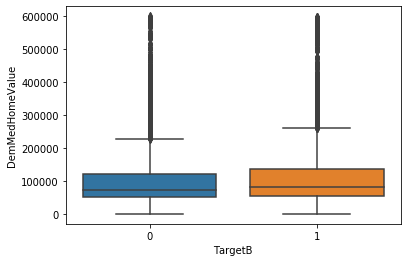

In [11]:
ax = sns.boxplot(x ='TargetB', y='DemMedHomeValue', data=df)
plt.show()

In [12]:
df['DemCluster'] = df['DemCluster'].astype(str)

In [13]:
df['DemHomeOwner'].value_counts()

H    5377
U    4309
Name: DemHomeOwner, dtype: int64

In [14]:
dem_home_owner_map = {'U':0, 'H': 1}
df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)

In [15]:
df['DemMedIncome'].value_counts()

0         2357
43100       10
46250        8
72339        8
48772        8
67860        7
73833        7
49277        7
57164        7
40054        7
65906        6
68819        6
44829        6
64579        6
65288        6
49337        6
55991        6
49601        6
56828        6
34619        6
87665        6
36250        6
59357        6
50000        6
97480        6
38750        6
80929        6
47580        6
47308        6
47076        6
          ... 
31820        1
50251        1
43867        1
35906        1
42047        1
59202        1
45928        1
48244        1
62589        1
42207        1
46261        1
45816        1
50395        1
102368       1
44238        1
76547        1
40136        1
56512        1
60598        1
64265        1
41770        1
46245        1
43787        1
33947        1
52370        1
40080        1
29464        1
51999        1
72485        1
41000        1
Name: DemMedIncome, Length: 4463, dtype: int64

In [16]:
mask = df['DemMedIncome'] <  1
import numpy as np
df.loc[mask, 'DemMedIncome'] = np.nan

In [17]:
df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)
df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)
df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)

In [18]:
df.drop(['ID', 'TargetD'], axis=1, inplace=True)

In [19]:
demo_df = pd.get_dummies(df['DemGender'])

In [20]:
demo_df

,F,M,U
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


3. Modifying and Correcting Data
Data exploration, grouping and plotting that we performed in the previous section reveal the following problems in the dataset:

a) Incorrect type used for DemCluster and DemHomeOwner. DemCluster should be an categorical/nominal variable
    and DemHomeOwner should be a binary variable.
b) Errorneous/invalid values (0) in DemMedIncome and DemAge.
c) Missing values in DemAge, DemMedIncome, GiftAvgCard36.
d) Redundant variables in ID and TargetD.
We will now rectify these problems.

3.1. Setting correct type to variables
3.2. Correcting invalid values
3.3. Imputing Missing Values
3.4. Dropping Unnecessary Variables
3.5. Formatting Categorical Variable
3.6. Wrapping up

In [21]:
# Convert DemCluster column to str
df['DemCluster'] = df['DemCluster'].astype(str)

In [22]:
#Check the number in different values.
df['DemHomeOwner'].value_counts()

# Change U and H into 0 and 1.
dem_home_owner_map = {'U':0, 'H': 1}
df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)

In [23]:
print(df['DemHomeOwner'].value_counts())

Series([], Name: DemHomeOwner, dtype: int64)


In [24]:
# Use 'unique' to check how many different value in this column
print(df['DemMedIncome'].unique())

[53513.45736117 38750.         38942.         ... 50530.
 62717.         59813.        ]


In [25]:
print(df['DemMedIncome'].value_counts())

53513.457361    2357
43100.000000      10
48772.000000       8
72339.000000       8
46250.000000       8
49277.000000       7
40054.000000       7
73833.000000       7
57164.000000       7
67860.000000       7
47076.000000       6
87665.000000       6
49337.000000       6
47580.000000       6
49601.000000       6
34619.000000       6
51377.000000       6
80929.000000       6
46240.000000       6
44829.000000       6
38750.000000       6
54217.000000       6
65906.000000       6
68819.000000       6
55991.000000       6
65288.000000       6
97480.000000       6
66949.000000       6
64579.000000       6
61523.000000       6
                ... 
43483.000000       1
46353.000000       1
45315.000000       1
26847.000000       1
28542.000000       1
60694.000000       1
51004.000000       1
32481.000000       1
27969.000000       1
49877.000000       1
38092.000000       1
56412.000000       1
39367.000000       1
26080.000000       1
44180.000000       1
42404.000000       1
42639.000000 

In [26]:
# Find out all rows which fit this condition
condition = df['DemMedIncome'] < 1

In [27]:
# Use 'loc' to give a nan value in these rows.
import numpy as np
df.loc[condition, 'DemMedIncome'] = np.nan

In [28]:
# impute missing values in DemAge with its mean
df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

# impute med income using mean
df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

# impute gift avg card 36 using mean
df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)

In [29]:
# after one hot encoding
demo_dfq = pd.get_dummies(df['DemGender'])
demo_dfq.head(5)

,F,M,U
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
